In [1]:
# imports
import pandas as pd
import tiktoken
import openai
from openai import OpenAI
client = OpenAI()
import os
openai.api_key = os.environ["OPENAI_API_KEY"]

In [2]:
def get_embedding(text, model="text-embedding-ada-002"):
   text = text.replace("\n", " ")
   return client.embeddings.create(input = [text], model=model).data[0].embedding

In [3]:
input_datapath = "fine_food_reviews_1k.csv"  
df = pd.read_csv(input_datapath, index_col=0)
df = df[["Time", "ProductId", "UserId", "Score", "Summary", "Text"]]
df = df.dropna()
df["combined"] = (
    "Title: " + df.Summary.str.strip() + "; Content: " + df.Text.str.strip()
)
df.head(2)

,Time,ProductId,UserId,Score,Summary,Text,combined
0,1351123200,B003XPF9BO,A3R7JR3FMEBXQB,5,where does one start...and stop... with a tre...,Wanted to save some to bring to my Chicago fam...,Title: where does one start...and stop... wit...
1,1351123200,B003JK537S,A3JBPC3WFUT5ZP,1,Arrived in pieces,"Not pleased at all. When I opened the box, mos...",Title: Arrived in pieces; Content: Not pleased...


In [5]:
df.iloc[0].values

array([1351123200, 'B003XPF9BO', 'A3R7JR3FMEBXQB', 5,
       'where does one  start...and stop... with a treat like this',
       'Wanted to save some to bring to my Chicago family but my North Carolina family ate all 4 boxes before I could pack. These are excellent...could serve to anyone',
       'Title: where does one  start...and stop... with a treat like this; Content: Wanted to save some to bring to my Chicago family but my North Carolina family ate all 4 boxes before I could pack. These are excellent...could serve to anyone'],
      dtype=object)

In [6]:
# embedding model parameters
embedding_model = "text-embedding-ada-002"
embedding_encoding = "cl100k_base"  # this the encoding for text-embedding-ada-002
max_tokens = 8000  # the maximum for text-embedding-ada-002 is 8191


In [7]:
def get_embedding(text, model="text-embedding-ada-002"):
   text = text.replace("\n", " ")
   return client.embeddings.create(input = [text], model=model).data[0].embedding

In [7]:
# df['ada_embedding'] = df.combined.apply(lambda x: get_embedding(x, model='text-embedding-ada-002'))
# df.to_csv('embedded_1k_reviews_with_embeddings.csv', index=False)

### 시간이 오래 걸리니깐 이미 만들어 둔 파일을 사용하자.

In [9]:
df = pd.read_csv('fine_food_reviews_1k_with_embeddings.csv')

In [10]:
df

,Time,ProductId,UserId,Score,Summary,Text,combined,ada_embedding
0,1351123200,B003XPF9BO,A3R7JR3FMEBXQB,5,where does one start...and stop... with a tre...,Wanted to save some to bring to my Chicago fam...,Title: where does one start...and stop... wit...,"[0.007060592994093895, -0.02732112631201744, 0..."
1,1351123200,B003JK537S,A3JBPC3WFUT5ZP,1,Arrived in pieces,"Not pleased at all. When I opened the box, mos...",Title: Arrived in pieces; Content: Not pleased...,"[-0.023547515273094177, -0.01182058546692133, ..."
2,1351123200,B000JMBE7M,AQX1N6A51QOKG,4,"It isn't blanc mange, but isn't bad . . .",I'm not sure that custard is really custard wi...,"Title: It isn't blanc mange, but isn't bad . ....","[0.00016697357932571322, 0.005226491950452328,..."
3,1351123200,B004AHGBX4,A2UY46X0OSNVUQ,3,These also have SALT and it's not sea salt.,I like the fact that you can see what you're g...,Title: These also have SALT and it's not sea s...,"[0.010539303533732891, -0.01352064497768879, 0..."
4,1351123200,B001BORBHO,A1AFOYZ9HSM2CZ,5,Happy with the product,My dog was suffering with itchy skin. He had ...,Title: Happy with the product; Content: My dog...,"[0.015255776233971119, -0.003898625960573554, ..."
...,...,...,...,...,...,...,...,...
995,1351209600,B004OQLIHK,AKHQMSUORSA91,5,Delicious!,I have ordered these raisins multiple times. ...,Title: Delicious!; Content: I have ordered the...,"[-0.00876990519464016, -0.01864185743033886, -..."
996,1351209600,B0006349W6,A21BT40VZCCYT4,5,Good Training Treat,My dog will come in from outside when I am tra...,Title: Good Training Treat; Content: My dog wi...,"[-0.024528082460165024, -0.017596233636140823,..."
997,1351209600,B00611F084,A6D4ND3C3BCYV,5,Jamica Me Crazy Coffee,Wolfgang Puck's Jamaica Me Crazy is that wonde...,Title: Jamica Me Crazy Coffee; Content: Wolfga...,"[-0.016790105029940605, -0.005199245177209377,..."
998,1351209600,B005QKH5HA,A3LR9HCV3D96I3,5,Party Peanuts,Great product for the price. Mix with the Asia...,Title: Party Peanuts; Content: Great product f...,"[-0.010757419280707836, -0.016502324491739273,..."


임베딩의 크기는 기반이 되는 모델의 복잡성에 따라 다릅니다. 이 고차원 데이터를 시각화하기 위해 t-SNE 알고리즘을 사용하여 데이터를 2차원으로 변환합니다.

개별 리뷰는 리뷰어가 준 별점에 따라 색으로 구분됩니다:

1점: 빨강
2점: 짙은 오렌지
3점: 금색
4점: Cyan
5점: 짙은 초록


In [ ]:
!pip install scikit-learn

Text(0.5, 1.0, 'Amazon ratings visualized in language using t-SNE')

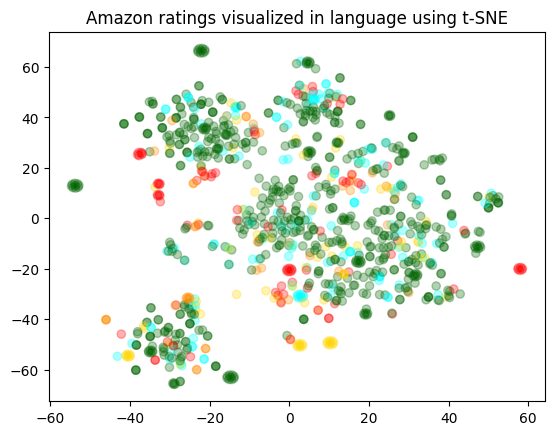

In [11]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

matrix = np.array(df.ada_embedding.apply(eval).to_list())

# Create a t-SNE model and transform the data
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
vis_dims = tsne.fit_transform(matrix)

colors = ["red", "darkorange", "gold", "cyan", "darkgreen"]
x = [x for x,y in vis_dims]
y = [y for x,y in vis_dims]
color_indices = df.Score.values - 1

colormap = matplotlib.colors.ListedColormap(colors)
plt.scatter(x, y, c=color_indices, cmap=colormap, alpha=0.3)
plt.title("Amazon ratings visualized in language using t-SNE")

# ML 알고리즘에 대한 텍스트 특성 인코더로서의 임베딩
 - 임베딩은 기계 학습 모델 내에서 일반적인 자유 텍스트 특성 인코더로 사용될 수 있습니다. 
 
 - 만약 관련 입력 중 일부가 자유 텍스트인 경우, 임베딩을 통합함으로써 모든 기계 학습 모델의 성능을 향상시킬 수 있습니다. 
 - 임베딩은 ML 모델 내에서 범주형 특성 인코더로도 사용될 수 있습니다. 이는 직업 제목과 같이 의미가 있는 많은 범주형 변수의 경우 가장 많은 가치를 제공합니다. 
 
 - 이 작업에는 유사성 임베딩이 검색 임베딩보다 일반적으로 더 나은 성능을 발휘합니다.

 - 일반적으로 임베딩 표현은 매우 풍부하고 정보가 밀도가 높습니다. 예를 들어, SVD(Singular Value Decomposition) 또는 PCA(Principal Component Analysis)를 사용하여 입력의 차원을 10% 줄인다고 해도, 특정 작업에 대한 하위 성능이 일반적으로 감소하는 것을 관찰할 수 있습니다.

 - 이 코드는 데이터를 학습 세트와 테스트 세트로 분할하며, 이후 회귀와 분류라는 두 가지 사용 사례에서 사용됩니다.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    list(df.ada_embedding.apply(eval).values),
    df.Score,
    test_size = 0.2,
    random_state=42
)

## 임베딩 기능을 사용한 회귀
 - 임베딩은 숫자 값 예측에 우아한 방식을 제공합니다. 이 예에서는 리뷰 내용을 기반으로 리뷰어의 별점을 예측합니다. 임베딩에 포함된 의미 정보가 높기 때문에, 리뷰가 매우 적은 경우에도 예측은 상당히 좋습니다.

 - 점수가 1과 5 사이의 연속적인 변수라고 가정하고, 알고리즘에게 어떤 부동 소수점 값을 예측하도록 허용합니다. ML 알고리즘은 예측 값과 실제 점수 사이의 거리를 최소화하며, 평균 절대 오차가 0.39로 나타납니다. 이는 평균적으로 예측이 절반 별점 이하로 오차가 발생한다는 것을 의미합니다.



In [13]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train, y_train)
preds = rfr.predict(X_test)

<AxesSubplot: >

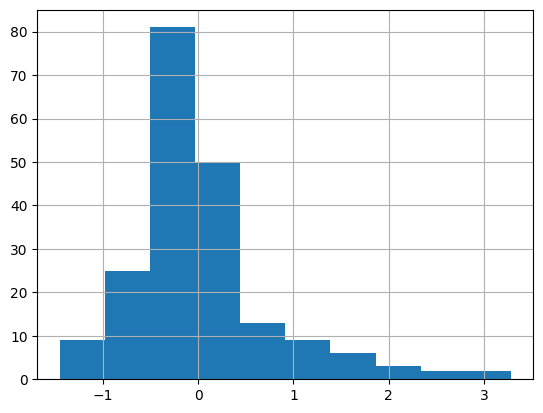

In [23]:
(pd.Series(preds) - pd.Series(y_test).reset_index()['Score']).hist()

## 임베딩 기능을 사용한 분류


 - 이번에는 알고리즘이 1부터 5까지의 정확한 별점을 가진 리뷰를 1부터 5까지의 범주로 분류하도록 시도합니다.

 - 훈련 후, 모델은 미묘한 차이가 있는 리뷰(2-4점)보다 1점과 5점 리뷰를 더 잘 예측하는 것을 배울 것입니다. 이는 더 극단적인 감정 표현 때문일 것으로 추측됩니다.



In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)

## 제로샷 분류


- 우리는 라벨이 지정된 훈련 데이터 없이 임베딩을 사용하여 제로샷 분류를 수행할 수 있습니다. 

- 각 클래스에 대해 클래스 이름이나 클래스의 간단한 설명을 임베딩합니다. 

- 제로샷 방식으로 새로운 텍스트를 분류하기 위해, 해당 텍스트의 임베딩을 모든 클래스 임베딩과 비교하고 가장 유사도가 높은 클래스를 예측합니다.



In [25]:
def cosine_similarity(a, b):

    a = np.array(a) if not isinstance(a, np.ndarray) else a
    b = np.array(b) if not isinstance(b, np.ndarray) else b
    

    if a.shape != b.shape:
        raise ValueError(f"Shape mismatch: a.shape = {a.shape}, b.shape = {b.shape}")

    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

In [29]:
def search_reviews(df, product_description, n=3, pprint=True):
   embedding = get_embedding(product_description, model='text-embedding-ada-002')
   df['ada_embedding'] = df['ada_embedding'].apply(eval).apply(np.array)
   
   df['similarities'] = df.ada_embedding.apply(lambda x: cosine_similarity(x, embedding))
   res = df.sort_values('similarities', ascending=False).head(n)
   return res

res = search_reviews(df, 'delicious beans', n=3)